# Final Project - Analysis of Sleep, Health, and Lifestyle

# Motivation
### Modern individuals often struggle with late nights and sleep disorders. This document aims to analyze the various factors that influence sleep and to examine the health impacts resulting from sleep deprivation.

***

# EDA

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [29]:
# read the file
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [31]:
#check the data type
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [33]:
# checking for null values
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [35]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [37]:
# checking for null values
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [39]:
# Create new dataframe - data_numerics
# Delete Person ID & Occupation
data_numerics = data.drop(columns = ['Person ID']).drop(columns = ['Occupation'])
data_numerics.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [41]:
# Change Male to 0, Female to 1
data_numerics['Gender'] = data_numerics['Gender'].replace({'Male': 0, 'Female': 1})
#data_numerics['Gender'] = data_numerics['Gender'].astype(int)
data_numerics.head()

/var/folders/dw/78t5nbcs77d9tdy2_0fqz4gw0000gn/T/ipykernel_1939/3999090922.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,0,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,0,28,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,0,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [43]:
# Extract the types of Sleep Disorder.
data_numerics['Sleep Disorder'].unique()

array(['No Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [45]:
# Change objects from Sleep Disorder : None to 0, Sleep Apnea and Insomnia to 1
data_numerics['Sleep Disorder'] = data_numerics['Sleep Disorder'].replace(
    {'Sleep Apnea': 1, 'Insomnia': 1, 'No Disorder': 0}
)
#data_numerics['Sleep Disorder'] = data_numerics['Sleep Disorder'].astype(int)
data_numerics.head()

/var/folders/dw/78t5nbcs77d9tdy2_0fqz4gw0000gn/T/ipykernel_1939/1392558261.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,6.1,6,42,6,Overweight,126/83,77,4200,0
1,0,28,6.2,6,60,8,Normal,125/80,75,10000,0
2,0,28,6.2,6,60,8,Normal,125/80,75,10000,0
3,0,28,5.9,4,30,8,Obese,140/90,85,3000,1
4,0,28,5.9,4,30,8,Obese,140/90,85,3000,1


In [47]:
# Extract the types of BMI_Category.
data_numerics['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [49]:
data_numerics['BMI Category'] = data_numerics['BMI Category'].replace('Normal Weight','Normal')
data_numerics.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,6.1,6,42,6,Overweight,126/83,77,4200,0
1,0,28,6.2,6,60,8,Normal,125/80,75,10000,0
2,0,28,6.2,6,60,8,Normal,125/80,75,10000,0
3,0,28,5.9,4,30,8,Obese,140/90,85,3000,1
4,0,28,5.9,4,30,8,Obese,140/90,85,3000,1


In [51]:
# Extract the types of BMI_Category.
data_numerics['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [53]:
# Classify the types within BMI_Category into grades.
data_numerics.rename(columns={'BMI Category': 'BMI_Level'}, inplace=True)
BMI_mapping = {'Normal': 1,                
               'Overweight': 2,
               'Obese': 3,
                   }
data_numerics['BMI_Level'] = data_numerics.BMI_Level.map(BMI_mapping)
data_numerics.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI_Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,6.1,6,42,6,2,126/83,77,4200,0
1,0,28,6.2,6,60,8,1,125/80,75,10000,0
2,0,28,6.2,6,60,8,1,125/80,75,10000,0
3,0,28,5.9,4,30,8,3,140/90,85,3000,1
4,0,28,5.9,4,30,8,3,140/90,85,3000,1


In [55]:
# Split the data on Blood Pressure into two columns: Systolic and Diastolic.
data_numerics[['Systolic', 'Diastolic']] = data_numerics['Blood Pressure'].str.split('/', expand=True)
data_numerics['Systolic'] = data_numerics['Systolic'].astype(int)
data_numerics['Diastolic'] = data_numerics['Diastolic'].astype(int)

# Delete column of  Blood Pressure
data_numerics = data_numerics.drop(columns=['Blood Pressure'])
data_numerics.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI_Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,0,27,6.1,6,42,6,2,77,4200,0,126,83
1,0,28,6.2,6,60,8,1,75,10000,0,125,80
2,0,28,6.2,6,60,8,1,75,10000,0,125,80
3,0,28,5.9,4,30,8,3,85,3000,1,140,90
4,0,28,5.9,4,30,8,3,85,3000,1,140,90


In [57]:
# Classify Blood Pressure into grades based on the values of Systolic and Diastolic.
def classify_blood_pressure(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 1
    elif 120 < row['Systolic'] < 130 and row['Diastolic'] < 80:
        return 2
    elif 130 <= row['Systolic'] < 140 or 80 <= row['Diastolic'] < 90:
        return 3
    elif row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        return 4
    elif row['Systolic'] > 180 or row['Diastolic'] > 120:
        return 5
    else:
        return None
data_numerics['Blood_Pressure_Level'] = data_numerics.apply(classify_blood_pressure, axis=1)
# Delete Systolic and Diastolic columns
data_numerics = data_numerics.drop(columns = ['Systolic']).drop(columns = ['Diastolic'])
data_numerics.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI_Level,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure_Level
0,0,27,6.1,6,42,6,2,77,4200,0,3
1,0,28,6.2,6,60,8,1,75,10000,0,3
2,0,28,6.2,6,60,8,1,75,10000,0,3
3,0,28,5.9,4,30,8,3,85,3000,1,4
4,0,28,5.9,4,30,8,3,85,3000,1,4


In [59]:
#check the data type
data_numerics.dtypes

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI_Level                    int64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
Blood_Pressure_Level         int64
dtype: object

In [61]:
data_numerics.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI_Level,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure_Level
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.494652,42.184492,7.132086,7.312834,59.171123,5.385027,1.449198,70.165775,6816.844920,0.414439,2.967914
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,0.549274,4.135676,1617.915679,0.493285,0.794780
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,1.000000,65.000000,3000.000000,0.000000,1.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,1.000000,68.000000,5600.000000,0.000000,3.000000
50%,0.000000,43.000000,7.200000,7.000000,60.000000,5.000000,1.000000,70.000000,7000.000000,0.000000,3.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,3.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000,4.000000


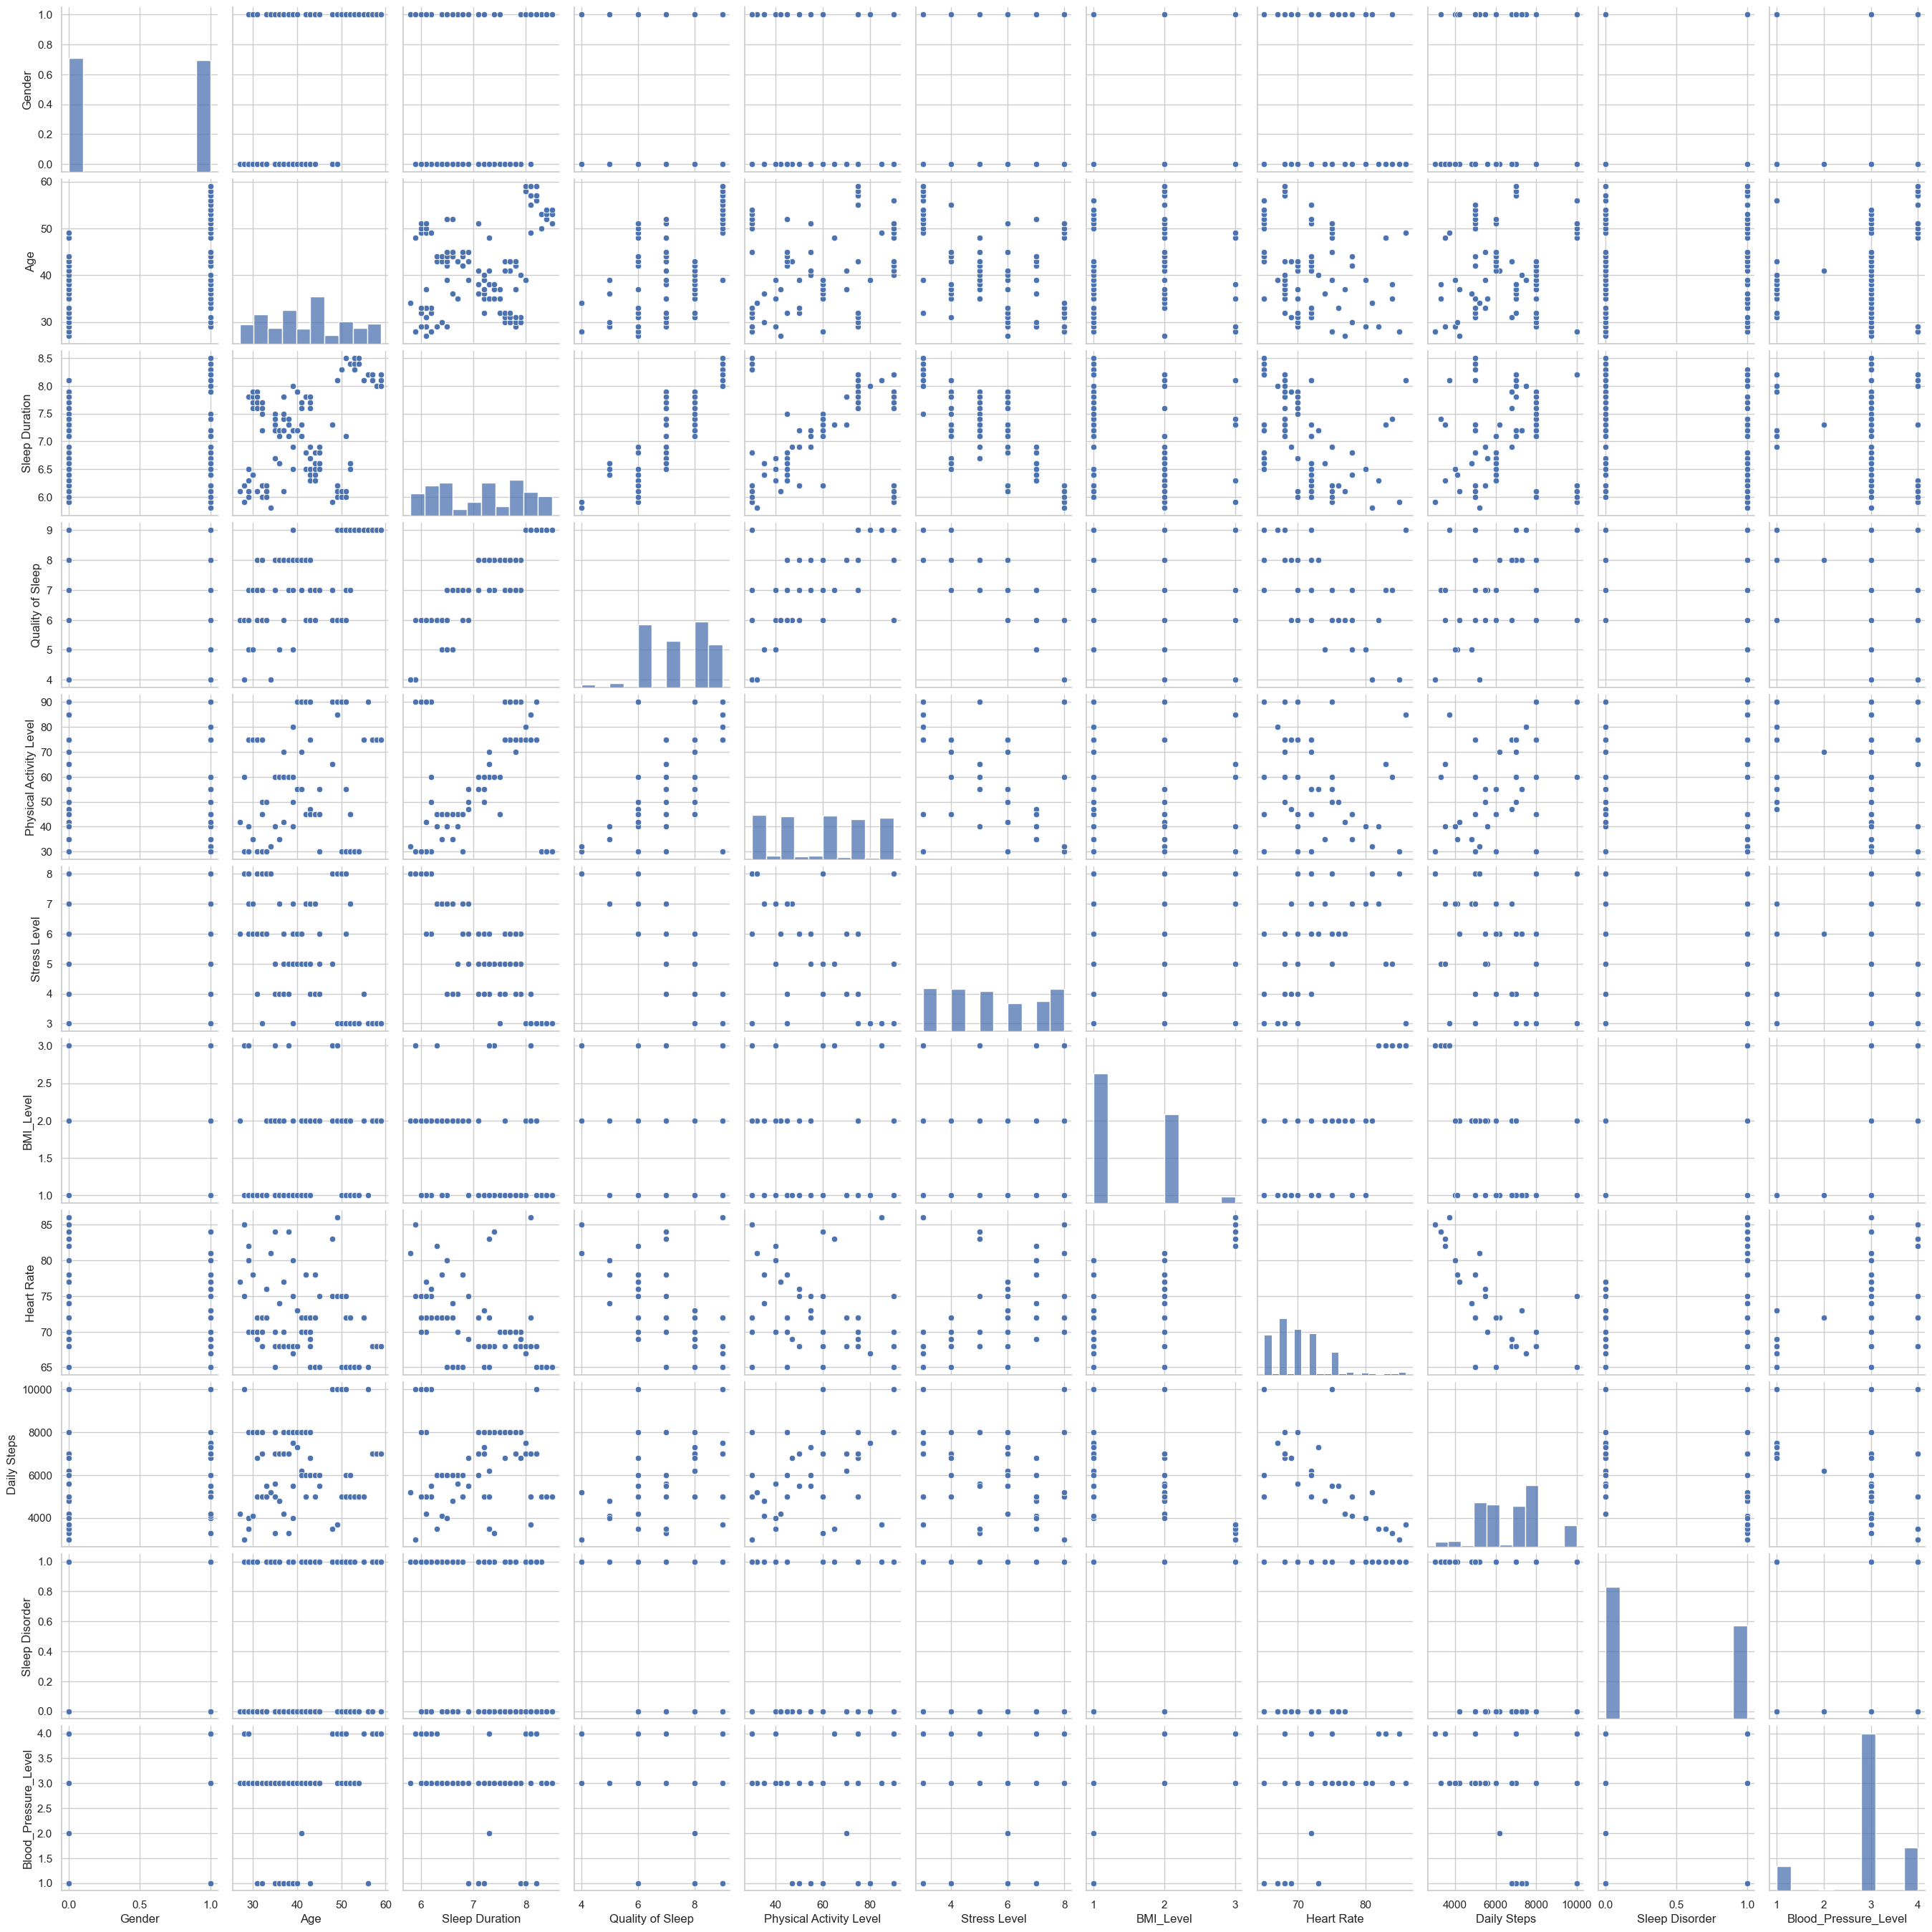

In [63]:
# Check the pair plot
sns.pairplot(data_numerics)

In [64]:
#Correlation
data_numerics.corr()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI_Level,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure_Level
Gender,1.000000,0.596358,0.121579,0.291366,-0.001454,-0.396018,0.242743,-0.217105,0.014509,0.285824,-0.047597
Age,0.596358,1.000000,0.344709,0.473734,0.178993,-0.422344,0.427704,-0.225606,0.057973,0.432007,0.415846
Sleep Duration,0.121579,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.349605,-0.516455,-0.039533,-0.338622,-0.075951
Quality of Sleep,0.291366,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.324413,-0.659865,0.016791,-0.310984,-0.166965
Physical Activity Level,-0.001454,0.178993,0.212360,0.192896,1.000000,-0.034134,0.052076,0.136971,0.772723,0.069787,0.189633
Stress Level,-0.396018,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.157649,0.670026,0.186829,0.181685,0.225487
BMI_Level,0.242743,0.427704,-0.349605,-0.324413,0.052076,0.157649,1.000000,0.469897,-0.142785,0.785389,0.505978
Heart Rate,-0.217105,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.469897,1.000000,-0.030309,0.330254,0.278124
Daily Steps,0.014509,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.142785,-0.030309,1.000000,-0.026575,0.111964
Sleep Disorder,0.285824,0.432007,-0.338622,-0.310984,0.069787,0.181685,0.785389,0.330254,-0.026575,1.000000,0.457981


<Axes: >

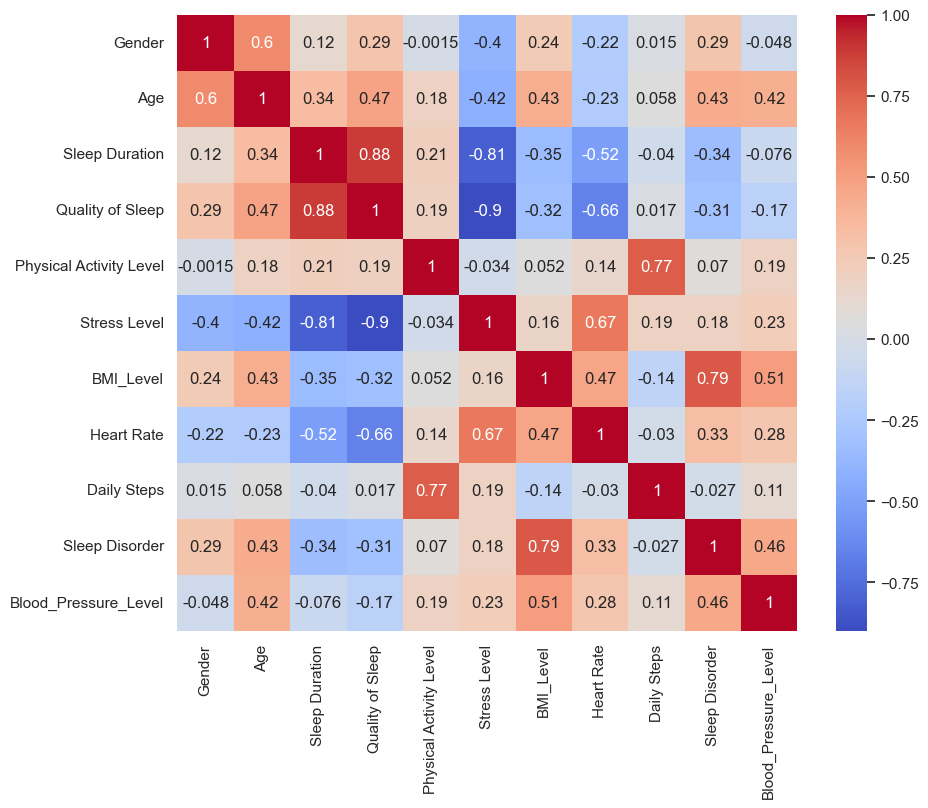

In [65]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerics.corr(),annot = True, cmap = "coolwarm")

### Strong Positive Correlation:
  1. Sleep Duration vs Quality of Sleep (0.88)
  2. Sleep Disorder vs BMI (0.79)
  3. Physical Activity Level vs Daily Steps (0.77)
### Strong Negative Correlation:
  1. Stress Level vs Quality of Sleep (-0.9)
  2. Stress Level vs Sleep Duration (-0.81)

*****

# The Relationship Between Sleep And Health

## 1. Sleep duration vs Quality of Sleep

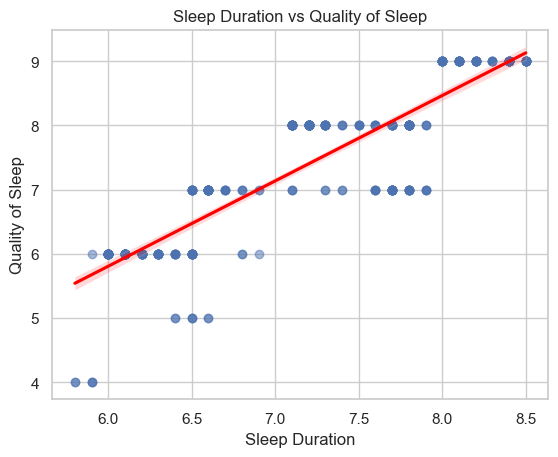

In [70]:
# Regression plot for Sleep Duration vs Quality of Sleep
sns.regplot(data=data_numerics, x='Sleep Duration', y='Quality of Sleep', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()

### ．Most people with longer sleep durations tend to have better sleep quality.
*****

## 2. Stress Level vs Quality of Sleep

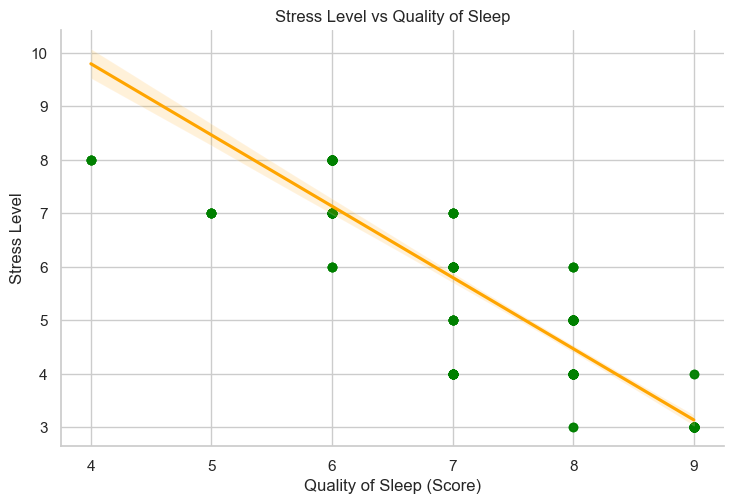

In [73]:
# Regression plot for Stress Level vs Quality of Sleep
sns.lmplot(x='Quality of Sleep', y='Stress Level', data=data_numerics, height=5, aspect=1.5, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Quality of Sleep (Score)')
plt.ylabel('Stress Level')
plt.show()

### ．People with high-stress levels usually have poor sleep quality.
### ．Stress may be one of the causes of sleep problems.
*****

## 3. Quality of Sleep vs Heart Rate

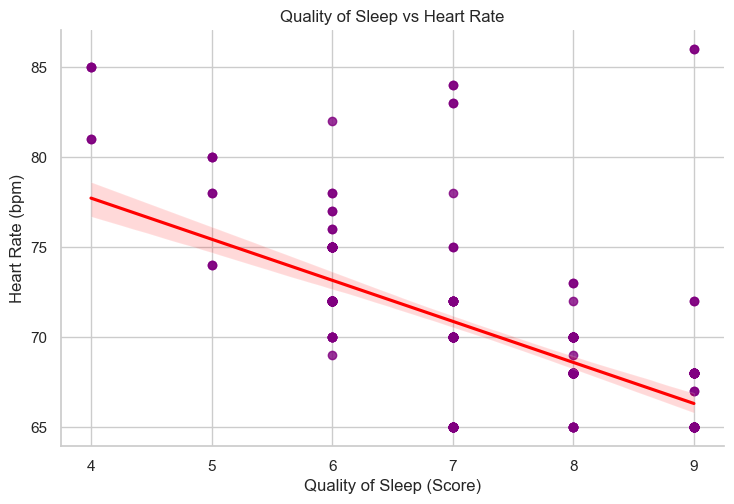

In [76]:
# Regression plot for Quality of Sleep vs Heart Rate
sns.lmplot(x='Quality of Sleep', y='Heart Rate', data=data_numerics, height=5, aspect=1.5, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Quality of Sleep vs Heart Rate')
plt.xlabel('Quality of Sleep (Score)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

### ．Although Quality of Sleep and Heart Rate show a moderate negative correlation, the chart's data points are scattered, suggesting that their relationship may not be very direct.
*****

## 4.Impact of Sleep Disorders on Health

In [92]:
# Count of Each Category
data['BMI Category']=data['BMI Category'].replace({'Normal':'Normal Weight'})
data['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

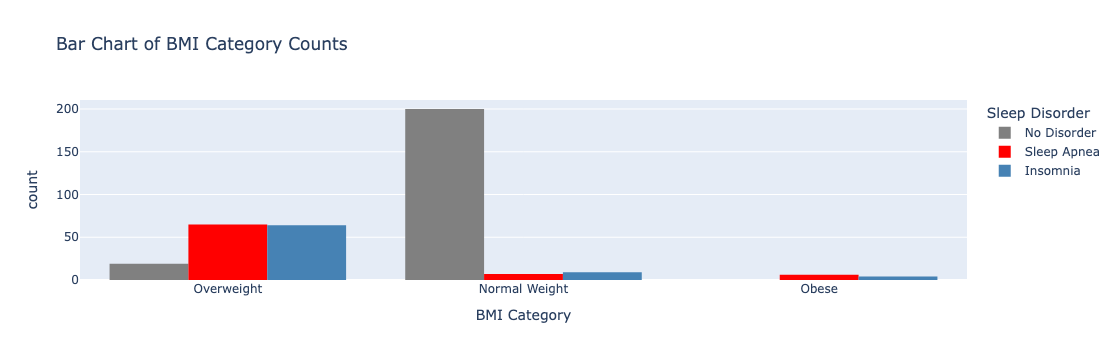

In [94]:
# Bar Chart of BMI and Sleep Disorder
fig = px.histogram(
    data_frame=data, 
    x='BMI Category', 
    color='Sleep Disorder', 
    title='Bar Chart of BMI Category Counts', 
    color_discrete_sequence=['#808080', '#FF0000', '#4682B4'], 
    barmode='group'  # 改为分组显示
)
fig.show()

### ．People with sleep disorders often face issues with being overweight.

*****

# Sleep and Health by Occupation

In [99]:
# Extract the average Sleep Duration for each occupation.
Occupation_SleepDuration_avg = data.groupby('Occupation')['Sleep Duration'].mean().reset_index()
Occupation_SleepDuration_avg

,Occupation,Sleep Duration
0,Accountant,7.113514
1,Doctor,6.970423
2,Engineer,7.987302
3,Lawyer,7.410638
4,Manager,6.900000
5,Nurse,7.063014
6,Sales Representative,5.900000
7,Salesperson,6.403125
8,Scientist,6.000000
9,Software Engineer,6.750000


In [101]:
# Extract the average Sleep Quality for each occupation.
Occupation_QualityofSleep_avg = data.groupby('Occupation')['Quality of Sleep'].mean().reset_index()
Occupation_QualityofSleep_avg

,Occupation,Quality of Sleep
0,Accountant,7.891892
1,Doctor,6.647887
2,Engineer,8.412698
3,Lawyer,7.893617
4,Manager,7.000000
5,Nurse,7.369863
6,Sales Representative,4.000000
7,Salesperson,6.000000
8,Scientist,5.000000
9,Software Engineer,6.500000


In [103]:
# Extract the average Stress Level for each occupation.
Occupation_StressLevel_avg = data.groupby('Occupation')['Stress Level'].mean().reset_index()
Occupation_StressLevel_avg

,Occupation,Stress Level
0,Accountant,4.594595
1,Doctor,6.732394
2,Engineer,3.888889
3,Lawyer,5.063830
4,Manager,5.000000
5,Nurse,5.547945
6,Sales Representative,8.000000
7,Salesperson,7.000000
8,Scientist,7.000000
9,Software Engineer,6.000000


In [105]:
# Merge columns
Occupation_tempt = pd.merge(Occupation_SleepDuration_avg,Occupation_QualityofSleep_avg,on = 'Occupation')
Occupation_tempt

,Occupation,Sleep Duration,Quality of Sleep
0,Accountant,7.113514,7.891892
1,Doctor,6.970423,6.647887
2,Engineer,7.987302,8.412698
3,Lawyer,7.410638,7.893617
4,Manager,6.900000,7.000000
5,Nurse,7.063014,7.369863
6,Sales Representative,5.900000,4.000000
7,Salesperson,6.403125,6.000000
8,Scientist,6.000000,5.000000
9,Software Engineer,6.750000,6.500000


In [107]:
# Merge columns
Occupation = pd.merge(Occupation_tempt,Occupation_StressLevel_avg,on = 'Occupation')
Occupation

,Occupation,Sleep Duration,Quality of Sleep,Stress Level
0,Accountant,7.113514,7.891892,4.594595
1,Doctor,6.970423,6.647887,6.732394
2,Engineer,7.987302,8.412698,3.888889
3,Lawyer,7.410638,7.893617,5.063830
4,Manager,6.900000,7.000000,5.000000
5,Nurse,7.063014,7.369863,5.547945
6,Sales Representative,5.900000,4.000000,8.000000
7,Salesperson,6.403125,6.000000,7.000000
8,Scientist,6.000000,5.000000,7.000000
9,Software Engineer,6.750000,6.500000,6.000000


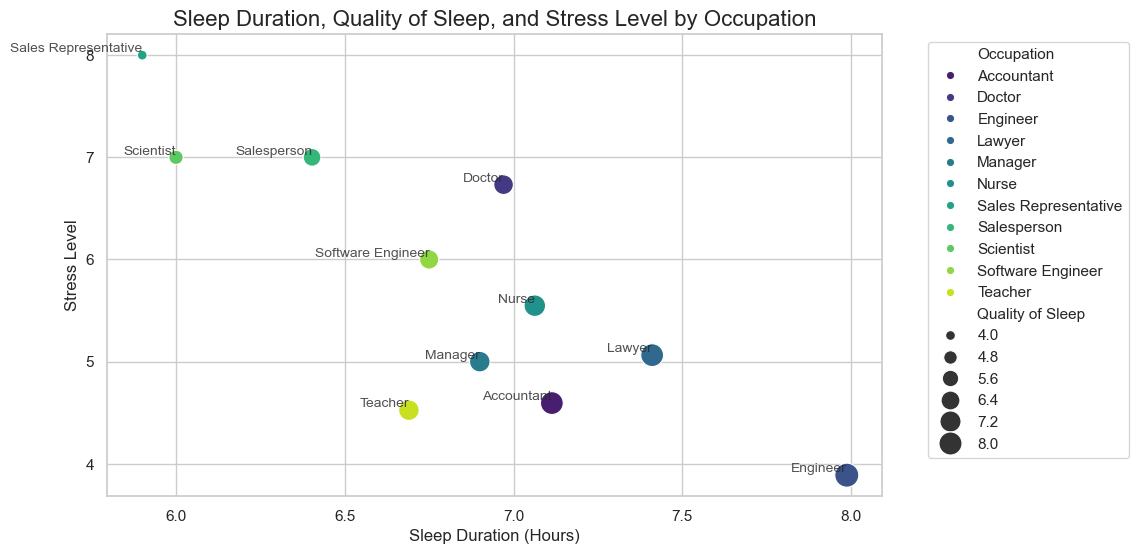

In [109]:
# Create a scatter plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=Occupation, 
    x="Sleep Duration", 
    y="Stress Level", 
    hue="Occupation", 
    size="Quality of Sleep", 
    sizes=(50, 300), 
    palette="viridis"
)

for i, row in Occupation.iterrows():
    plt.text(
        row["Sleep Duration"], 
        row["Stress Level"], 
        row["Occupation"], 
        fontsize=10, 
        ha="right", 
        va="bottom", 
        alpha=0.8    
    )
    
plt.title("Sleep Duration, Quality of Sleep, and Stress Level by Occupation", fontsize=16)
plt.xlabel("Sleep Duration (Hours)", fontsize=12)
plt.ylabel("Stress Level", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### ．The Sales Representative has a short sleep duration, poor sleep quality, and high-stress levels.
### ．The Engineer has a long sleep duration, good sleep quality, and low-stress levels.

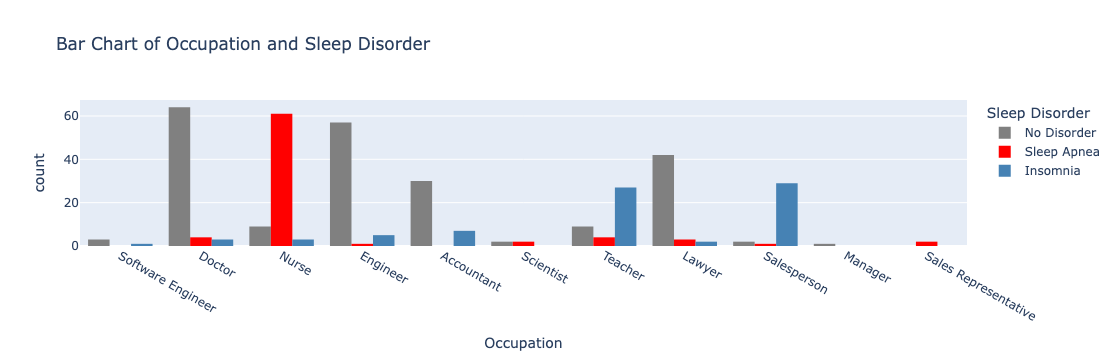

In [112]:
fig = px.histogram(
                    data_frame=data, 
                    x='Occupation', 
                    color='Sleep Disorder', 
                    title='Bar Chart of Occupation and Sleep Disorder', 
                    color_discrete_sequence=['#808080', '#FF0000', '#4682B4'],
                    barmode='group'
                    )
fig.show()

### ．Occupation of Nurse,Teacher, Sales person and sales representative are prone to sleep disorder.
### ．Although teachers experience less stress, their sleep duration is shorter compared to other professions with higher stress levels due to the impact of sleep disorders.

*****

# Linear Regression

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select independent variables (features) and the dependent variable (target)
# - Sleep Duration: Daily sleep hours
# - Stress Level: Stress score
# - Physical Activity Level: Physical activity level
# The target variable is Heart Rate
X = data_numerics[['Sleep Duration', 'Stress Level', 'Physical Activity Level']]
y = data_numerics['Heart Rate']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set and calculate the Mean Squared Error (MSE)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
if mse < 20:
    print("The model performs well, with predictions close to actual values.")
elif mse < 50:
    print("The model performance is moderate, and there's room for improvement.")
else:
    print("The model performs poorly, and additional feature engineering or alternative models may be needed.")

Mean Squared Error: 12.034336946520025
The model performs well, with predictions close to actual values.


# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data_numerics['High_Stress'] = data_numerics['Stress Level'].apply(lambda x: 1 if x > 7 else 0)

# Features:
# - Sleep Duration: Daily sleep hours
# - Physical Activity Level: Physical activity level
# - Heart Rate: Resting heart rate
# Target variable: High_Stress (High stress level)
X = data_numerics[['Sleep Duration', 'Physical Activity Level', 'Heart Rate']]
y = data_numerics['High_Stress']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

if accuracy > 0.8:
    print("The classification model performs well with high prediction accuracy.")
elif accuracy > 0.6:
    print("The model performs moderately; feature adjustments or parameter tuning may improve it.")
else:
    print("The model performs poorly; consider alternative classification methods such as Decision Trees or Random Forests.")

Accuracy: 0.9733333333333334
Confusion Matrix:
 [[57  1]
 [ 1 16]]
The classification model performs well with high prediction accuracy.


# Visualizing The Confusion Matrix

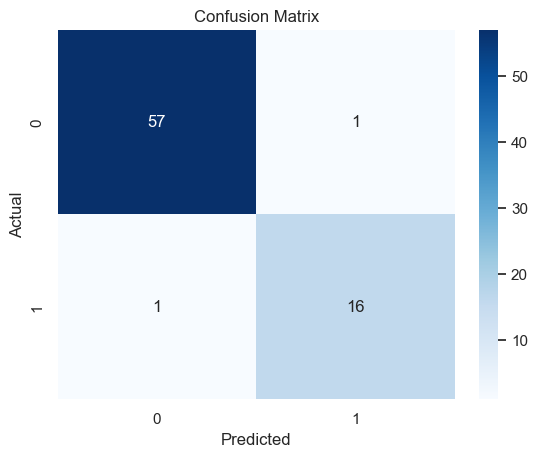

In [134]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Key Metrics and Interpretation of The Confusion Matrix**

### **1. True Positive (TP) = 57**
- The model correctly classified 57 cases as positive (e.g., high stress).
- Indicates the model is highly effective at detecting actual positive cases.

### **2. False Negative (FN) = 1**
- The model misclassified 1 actual positive case as negative.
- A low FN count suggests the model rarely misses true positive cases.

### **3. False Positive (FP) = 1**
- The model incorrectly classified 1 actual negative case as positive.
- A low FP count suggests the model has good precision and doesn’t frequently raise false alarms.

### **4. True Negative (TN) = 16**
- The model correctly classified 16 cases as negative (e.g., low stress).
- Indicates the model performs well in identifying actual negatives.

---

## **Conclusion**
- **Stress Level** has the most significant impact on Heart Rate and is a crucial feature for predicting it.  
- The **negative correlation of Sleep Duration** indicates that adequate sleep plays an essential role in maintaining a stable Heart Rate.  
- While the model's overall performance is satisfactory, there is room for further optimization.